The dataset in use is the Global Precipitation Climatatology Project (GPCP) Climate Data Record (CDR), Daily V1.3. I currently have access to 2 versions one on the servers and one from NOAA NCEI. It is a precipitation dataset with spacial resolution of one degree and a temporal resolution of one day. More details can be seen below.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import xarray as xr

In [12]:
pfile = '/data/vortex/scratch/gpcp.prec.day.mean.nc'
sfile = '/scratch/zmanthos/GPCP/gpcp_v01r03_daily_d19961001_c20170530.nc'
precip = xr.open_dataset(sfile,decode_times=True,decode_cf=True)

In [13]:
# metadata for the GPCP data on the server
print(precip)

<xarray.Dataset>
Dimensions:      (latitude: 180, longitude: 360, nv: 2, time: 1)
Coordinates:
  * latitude     (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0
  * longitude    (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 1996-10-01 00:00:00
Dimensions without coordinates: nv
Data variables:
    lat_bounds   (latitude, nv) float32 ...
    lon_bounds   (longitude, nv) float32 ...
    time_bounds  (time, nv) object ...
    precip       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:                CF-1.6, ACDD 1.3
    title:                      Global Precipitation Climatatology Project (G...
    source:                     /data1/GPCP_CDR/GPCP_Output/1DD//bin/199610/s...
    references:                 Huffman et al. 1997, http://dx.doi.org/10.117...
    history:                    1) 2017-05-30T16:52:42Z, Dr. Jian-Jian Wang, ...
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, N

In [14]:
# metadata for a single file of GPCP found at:
#    https://www.ncei.noaa.gov/data/global-precipitation-climatology-project-gpcp-daily/access/
print(precipsingle.attrs['title'])
print(precipsingle)

Global Precipitation Climatatology Project (GPCP) Climate Data Record (CDR), Daily V1.3
<xarray.Dataset>
Dimensions:      (latitude: 180, longitude: 360, nv: 2, time: 1)
Coordinates:
  * latitude     (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0
  * longitude    (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 1996-10-01 00:00:00
Dimensions without coordinates: nv
Data variables:
    lat_bounds   (latitude, nv) float32 ...
    lon_bounds   (longitude, nv) float32 ...
    time_bounds  (time, nv) object ...
    precip       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:                CF-1.6, ACDD 1.3
    title:                      Global Precipitation Climatatology Project (G...
    source:                     /data1/GPCP_CDR/GPCP_Output/1DD//bin/199610/s...
    references:                 Huffman et al. 1997, http://dx.doi.org/10.117...
    history:                    1) 2017-05-30T16:52:42Z, Dr. Jian-

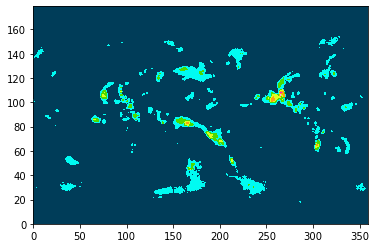

In [11]:
plt.contourf(precipsingle['precip'][0,:,:], cmap='gist_ncar')


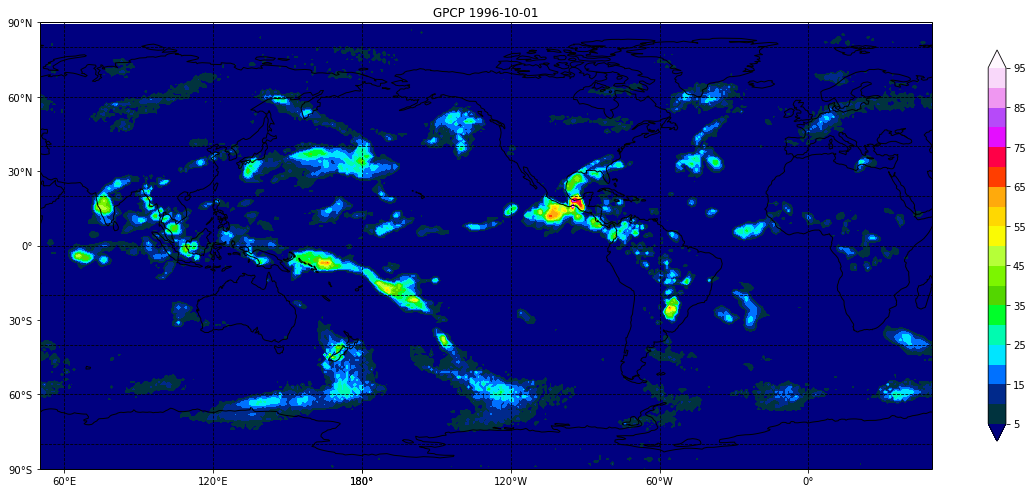

In [55]:
lats = precip['latitude']
lons = precip['longitude']
data = precip['precip']
data, lons = add_cyclic_point(data,coord=lons)
levels = 20;
title = 'GPCP 1996-10-01'
#print(data)

fig = plt.figure(figsize=(20,12))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=230))
plt.contourf( lons, lats, data[0], levels=levels, extend='both', cmap='gist_ncar', transform=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
plt.colorbar(ax=ax, shrink=0.6)
ax.gridlines(color="black", linestyle="dashed")
plt.title(title)

ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

Text(0.5, 1.0, 'GPCP 1996-10-01')

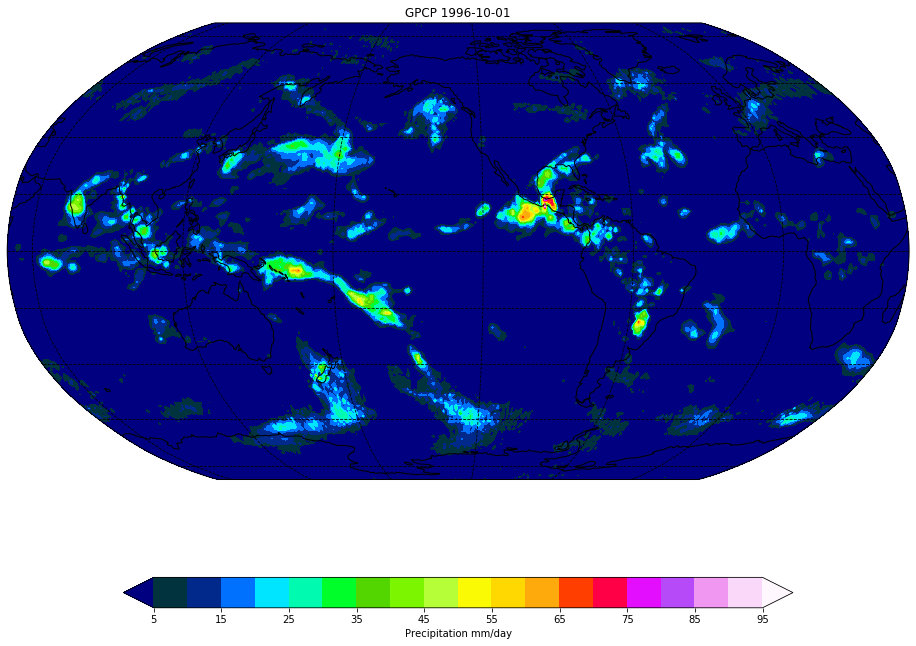

In [58]:
fig = plt.figure(figsize=(20,12))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=230, globe=None, false_easting=None, false_northing=None))
plt.contourf( lons, lats, data[0], levels=levels, extend='both', cmap='gist_ncar', transform=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
plt.colorbar(ax=ax, orientation='horizontal', shrink=0.6, label='Precipitation mm/day')
ax.gridlines(color="black", linestyle="dashed")
plt.title(title)

#ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
#lon_formatter=cticker.LongitudeFormatter()
#ax.xaxis.set_major_formatter(lon_formatter)
#ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
#lat_formatter=cticker.LatitudeFormatter()
#ax.yaxis.set_major_formatter(lat_formatter)